# Principal Component Analysis with Cancer Data

In [296]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [235]:
breastcancer = pd.read_csv('breast-cancer-wisconsin-data.csv')
breastcancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [236]:
# Id columns is to identify rows hence can be skipped in analysis
#breastcancer.drop(columns='ID',inplace=True)

# All columns have numerical values

# Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [237]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [238]:
breastcancer.shape

(699, 11)

In [239]:
breastcancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [240]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

# Replacing ? with NaN in the entire dataframe
for column in breastcancer:
    #missing_values.append(breastcancer[breastcancer[column].str.contains('?')])
    breastcancer[column] = pd.to_numeric(breastcancer[column], errors='coerce')

breastcancer[breastcancer.isnull().any(axis=1)]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [241]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
breastcancer['Bare Nuclei'].isna().sum()

16

In [242]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
breastcancer['Bare Nuclei'] = breastcancer['Bare Nuclei'].fillna(breastcancer['Bare Nuclei'].mode()[0])
#breastcancer.isna().sum()
breastcancer['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [243]:
#Checking for duplicate rows and dropping them

breastcancer.drop_duplicates(keep='first',inplace=True) 
breastcancer.shape

(690, 11)

In [244]:
# Dropping ID column
breastcancer.drop(columns='ID',inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


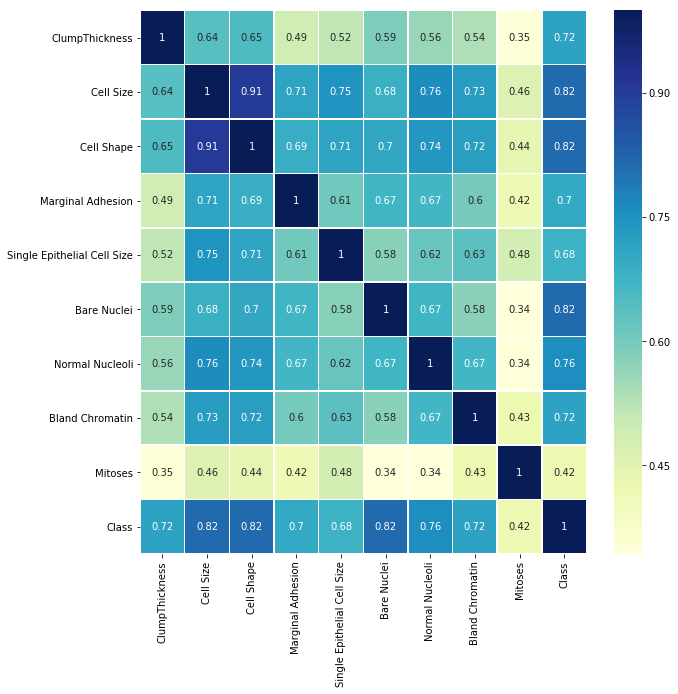

In [245]:
# Check for correlation of variable
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(breastcancer.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)

* Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
* Target variable shows high correlation with most of these variables
* Except for Mitoses, most variables show high correlation with each other.

In [0]:
#Let us check for pair plots

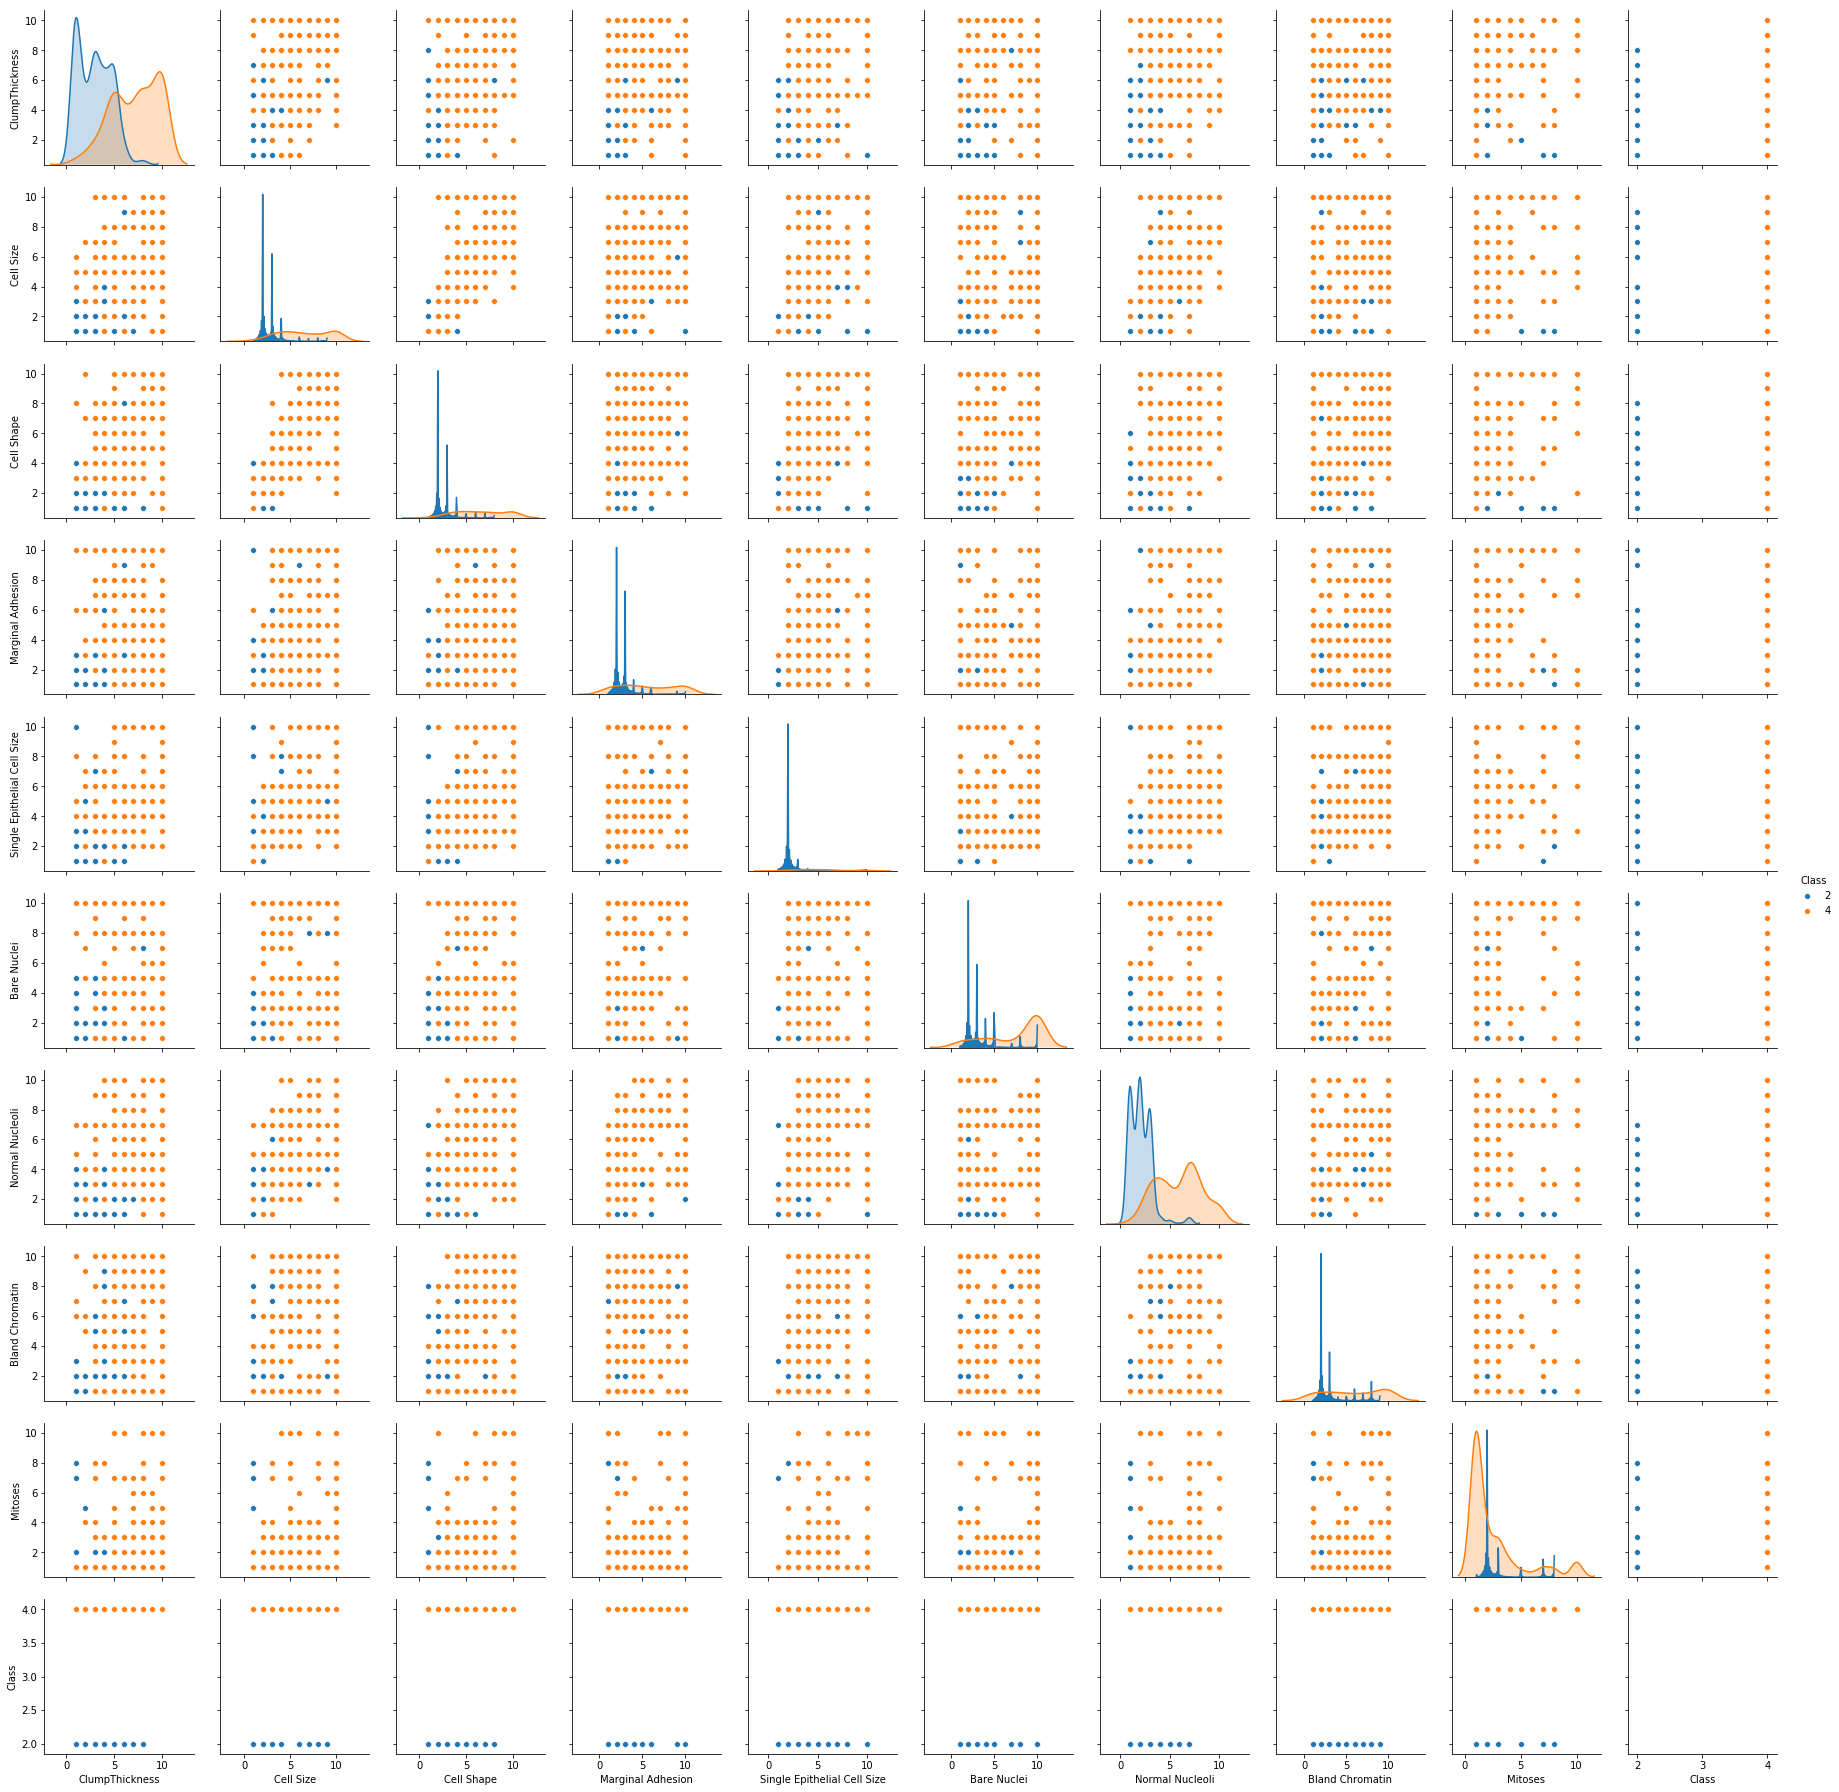

In [246]:
sns.pairplot(breastcancer,hue='Class')

* Relationship between variables shows come correlation. 
* Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

**Outliers based on zscores**

In [247]:
breastcancer_zscores = pd.DataFrame(stats.zscore(breastcancer),columns=breastcancer.columns)

In [248]:
threshold = 3

In [249]:
for column in breastcancer_zscores:
    print('No. of outliers in ',column, '=',(np.abs(breastcancer_zscores[column]) > threshold).sum())

No. of outliers in  ClumpThickness = 0
No. of outliers in  Cell Size = 0
No. of outliers in  Cell Shape = 0
No. of outliers in  Marginal Adhesion = 0
No. of outliers in  Single Epithelial Cell Size = 30
No. of outliers in  Bare Nuclei = 0
No. of outliers in  Normal Nucleoli = 0
No. of outliers in  Bland Chromatin = 0
No. of outliers in  Mitoses = 31
No. of outliers in  Class = 0


**Outliers based on IQR/boxplot**

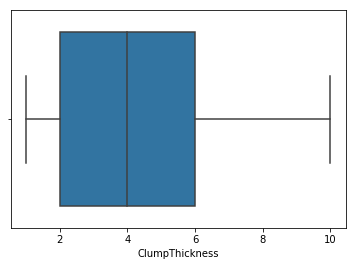

In [250]:
sns.boxplot(breastcancer['ClumpThickness'])

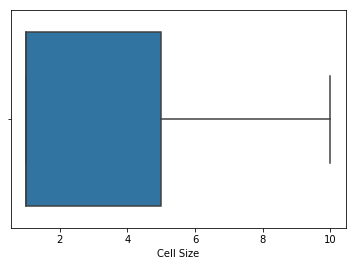

In [251]:
sns.boxplot(breastcancer['Cell Size'])

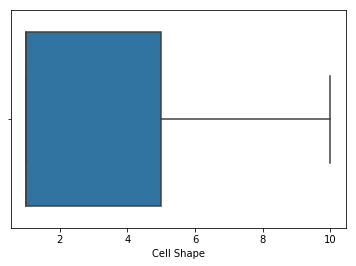

In [252]:
sns.boxplot(breastcancer['Cell Shape'])

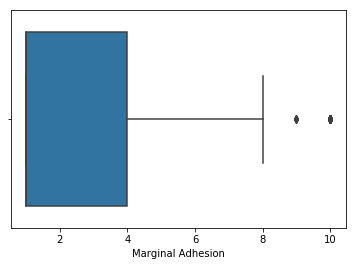

In [253]:
sns.boxplot(breastcancer['Marginal Adhesion'])

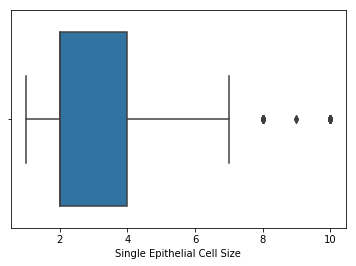

In [254]:
sns.boxplot(breastcancer['Single Epithelial Cell Size'])

In [255]:
pd.crosstab(breastcancer['Single Epithelial Cell Size'],breastcancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


Treating Outliers in Single Epithelial Cell Size

In [256]:
breastcancer['Single Epithelial Cell Size'] = np.where(breastcancer['Single Epithelial Cell Size'] > 3,3,breastcancer['Single Epithelial Cell Size'])

In [257]:
pd.crosstab(breastcancer['Single Epithelial Cell Size'],breastcancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


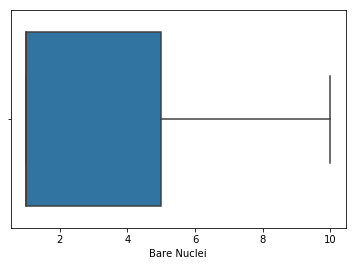

In [258]:
sns.boxplot(breastcancer['Bare Nuclei'])

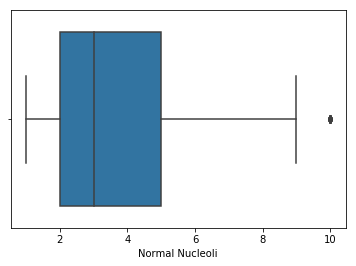

In [259]:
sns.boxplot(breastcancer['Normal Nucleoli'])

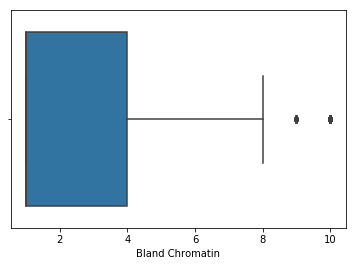

In [260]:
sns.boxplot(breastcancer['Bland Chromatin'])

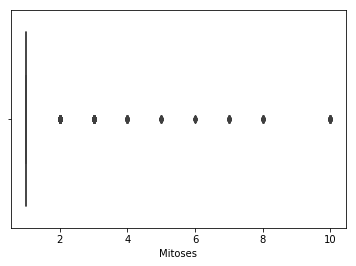

In [261]:
sns.boxplot(breastcancer['Mitoses'])

In [262]:
pd.crosstab(breastcancer['Mitoses'],breastcancer['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


Treating outliers in Mitoses

In [263]:
breastcancer['Mitoses'] = np.where(breastcancer['Mitoses'] > 4,4,breastcancer['Mitoses'])

In [264]:
pd.crosstab(breastcancer['Mitoses'],breastcancer['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,3,49


# Q6 Create a covariance matrix for identifying Principal components

In [265]:
breastcancer_zscores.drop(columns='Class',inplace=True)

In [266]:
# PCA
# Creating covariance matrix
cov_matrix = np.cov(breastcancer_zscores.T)
print('Covariance Matrix \n',cov_matrix)

Covariance Matrix 
 [[1.00145138 0.64410677 0.65453792 0.48842317 0.51800374 0.59150555
  0.56187702 0.53628373 0.35070402]
 [0.64410677 1.00145138 0.9066632  0.71396807 0.74806589 0.68556472
  0.76073447 0.7281282  0.46058509]
 [0.65453792 0.9066632  1.00145138 0.6917849  0.71527957 0.70518656
  0.73964761 0.72557104 0.44107467]
 [0.48842317 0.71396807 0.6917849  1.00145138 0.60916409 0.67348849
  0.67083263 0.60310209 0.41761286]
 [0.51800374 0.74806589 0.71527957 0.60916409 1.00145138 0.58132945
  0.62142658 0.63480034 0.48321685]
 [0.59150555 0.68556472 0.70518656 0.67348849 0.58132945 1.00145138
  0.67373075 0.57900023 0.34332099]
 [0.56187702 0.76073447 0.73964761 0.67083263 0.62142658 0.67373075
  1.00145138 0.67006996 0.34426827]
 [0.53628373 0.7281282  0.72557104 0.60310209 0.63480034 0.57900023
  0.67006996 1.00145138 0.42811085]
 [0.35070402 0.46058509 0.44107467 0.41761286 0.48321685 0.34332099
  0.34426827 0.42811085 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [218]:
#Getting eigen values and eigen vector

In [267]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30202869  0.14902209 -0.86872874 -0.00254656 -0.02905197  0.26616691
  -0.19399832 -0.1501391  -0.00300703]
 [-0.38089144  0.04833557  0.03657788 -0.73669737  0.18962075 -0.43946502
  -0.23349186  0.09850317  0.12335951]
 [-0.37721125  0.08333455 -0.02039666  0.66430356  0.16770378 -0.58940349
  -0.15127833  0.06480163  0.08028927]
 [-0.33430954  0.05023423  0.39037637  0.04590901 -0.48684422  0.19404134
  -0.4924605  -0.46232255 -0.0168367 ]
 [-0.33589151 -0.17389022  0.15761632  0.06657451  0.32855055  0.38975065
   0.21090367 -0.06957883  0.72006348]
 [-0.33284901  0.24716817 -0.0294455  -0.07105867 -0.55680581 -0.15915546
   0.69544634  0.01237327  0.05514693]
 [-0.34648894  0.22989544  0.18320773  0.06252437  0.00966191  0.39882942
  -0.12659342  0.73810848 -0.26387659]
 [-0.3364694  -0.02071698  0.1357351  -0.02018486  0.47674458  0.1133626
   0.31256571 -0.41188028 -0.60004044]
 [-0.22972022 -0.90629849 -0.11603305  0.0080874  -0.22956737 -0.04272175
   0.0243

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 65.55540722  74.1768597   80.1774794   85.35224664  89.46666895
  92.81611041  96.07271412  98.9962097  100.        ]


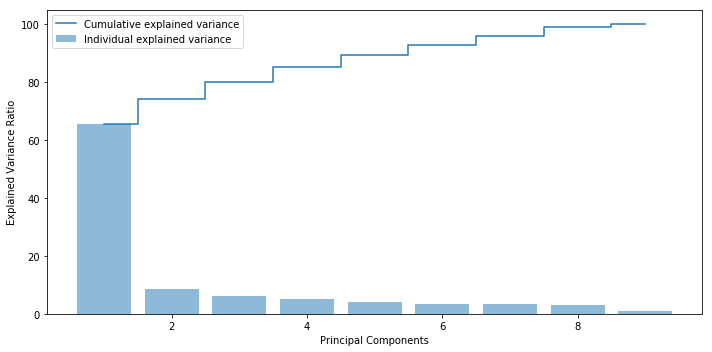

In [268]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [269]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 9 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(breastcancer_zscores)
data_reduced.transpose()

array([[-1.46219383,  1.46493511, -1.58466481, ...,  3.82442245,
         2.26583503,  2.66276564],
       [-0.11255721, -0.52824321, -0.07507619, ..., -0.16947098,
        -1.11554682, -1.19224433],
       [-0.57852431,  0.31106239,  0.03046945, ...,  0.78842729,
         0.98218784,  1.07958354],
       [ 0.03202361, -0.77437644, -0.10138831, ...,  2.48877243,
         0.74521696,  0.37298487]])

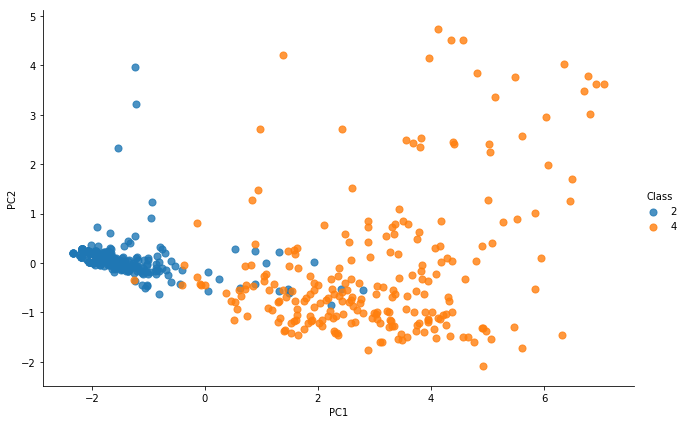

In [270]:
## Plot of PC1 and PC2
breastcancer["PC1"] = data_reduced[:,0]
breastcancer["PC2"] = data_reduced[:,1]
breastcancer["PC3"] = data_reduced[:,2]
breastcancer["PC4"] = data_reduced[:,3]
vis = sns.lmplot(data = breastcancer[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

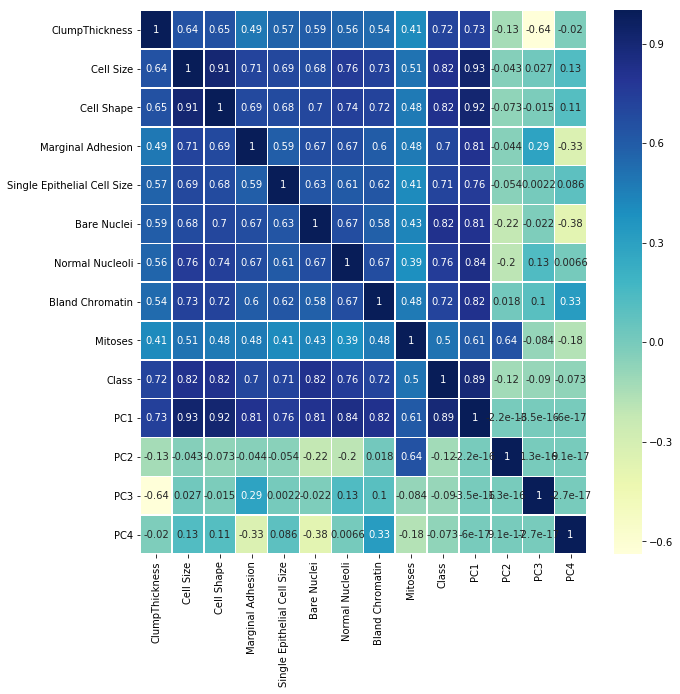

In [271]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(breastcancer.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [328]:
data = pd.read_csv('jokes.csv')
data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [329]:
ratings = data.iloc[0:200,1:]
ratings.shape

(200, 100)

In [330]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [333]:
column_indices = list(range(100))
new_names = list(range(100))
old_names = ratings.columns[column_indices]
ratings.rename(columns=dict(zip(old_names, new_names)), inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [334]:
ratings.replace(99.00,0,inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [339]:
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings.T)
ratings_diff = pd.DataFrame(ratings_diff.T,columns=ratings.columns)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.927207,1.989411,-1.250300,-0.986909,-0.874529,-1.046611,-1.283663,1.178166,-1.130896,-0.389889,...,0.941114,0.445939,0.445939,0.445939,0.445939,0.445939,-0.542656,0.445939,0.445939,0.445939
1,0.274579,-0.625106,0.743980,0.334284,-1.055391,-2.554180,-0.715693,-1.664789,1.262792,1.332790,...,0.015173,-1.584496,-0.625106,1.052797,-0.604519,-1.005980,0.064584,-0.495403,-1.454794,-0.345113
2,-0.787867,-0.787867,-0.787867,-0.787867,1.257275,1.311631,1.257275,1.311631,-0.787867,-0.787867,...,-0.787867,-0.787867,-0.787867,1.268600,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867
3,-0.347962,1.929242,-0.347962,-0.347962,0.142932,1.877425,-1.117030,1.345623,-0.347962,0.153841,...,-0.347962,-0.347962,-0.347962,-0.203421,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962
4,1.306203,0.389048,-1.681034,-1.968676,-0.377212,-0.320627,0.961975,0.389048,-0.801603,0.653113,...,0.525796,0.617747,0.308885,0.525796,0.653113,-0.332416,0.035389,0.846447,-0.273472,-0.320627


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [359]:
print('Top 10 Joke IDs are:')
print(np.argsort(ratings_diff.mean())[:10])

Top 10 Joke IDs are:
0    15
1    57
2    14
3    16
4    12
5    43
6    23
7    19
8    56
9    63
dtype: int64


In [361]:
ratings_diff.mean()

0    -0.007507
1    -0.045999
2    -0.107076
3    -0.329460
4    -0.177909
5     0.144163
6    -0.142459
7    -0.252950
8    -0.144466
9     0.075010
10    0.126926
11    0.136238
12   -0.491062
13    0.305134
14   -0.573069
15   -0.923862
16   -0.497120
17   -0.371601
18   -0.117048
19   -0.397045
20    0.441633
21    0.075386
22   -0.105073
23   -0.423829
24   -0.022530
25    0.087073
26    0.609724
27    0.102890
28    0.664230
29   -0.358857
        ...   
70   -0.259947
71    0.060485
72   -0.105039
73   -0.285067
74   -0.215566
75   -0.036371
76   -0.160957
77   -0.034641
78   -0.144125
79   -0.059596
80   -0.091281
81   -0.120393
82    0.007780
83   -0.089846
84   -0.092963
85   -0.151848
86   -0.049152
87   -0.007430
88    0.115873
89   -0.256205
90   -0.053344
91   -0.133701
92    0.074619
93   -0.055371
94   -0.059690
95   -0.083747
96   -0.001601
97   -0.185666
98   -0.167527
99   -0.060599
Length: 100, dtype: float64